# Some Kaggle Starter Code for Reading Data

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# read data from zip
import zipfile
import pandas as pd

# 1. Access data from zip file

In [17]:


# Path to the zip file in the repository
zip_file_path = './Group7_data.zip'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List all files in the zip archive
    print("Files in the zip archive:", zip_ref.namelist())
    
    # Extract and read a specific file (e.g., 'data.csv') into a pandas DataFrame
    with zip_ref.open('indian_liver_patient.csv') as file:
        df = pd.read_csv(file)
# Display the first few rows of the DataFrame
print(df.head())

Files in the zip archive: ['indian_liver_patient.csv']
   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dat

# 2. Print relevant dataset characteristics: shape, columns, dimensions, size and clean up missing values

In [18]:
# print relevant datset characteristics and visualize sample digits
print("Shape of the dataset:", df.shape)
print("Columns in the dataset:", df.columns)
print("First few rows of the dataset:")
print(df.head())
# visualize sample digits from the dataset
# Display the first few rows of the DataFrame
print("First few rows of the dataset:")
print(df.head())
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())
# Drop rows with missing values
df.dropna(inplace=True)
# Check for missing values again
print("Missing values after dropping rows:")
print(df.isnull().sum())
# Check the data types of the columns
print("Data types of the columns:")
print(df.dtypes)


Shape of the dataset: (583, 11)
Columns in the dataset: Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')
First few rows of the dataset:
   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         1

# 3. Visualize the Dataset
Heatmap gives us a visual of how each variable correlates to other variables in the dataset.  In a more advanced setting, we might use these correlations to edit certain variables to improve the performance of our model.

Columns after one-hot encoding: Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset',
       'Gender_Male'],
      dtype='object')


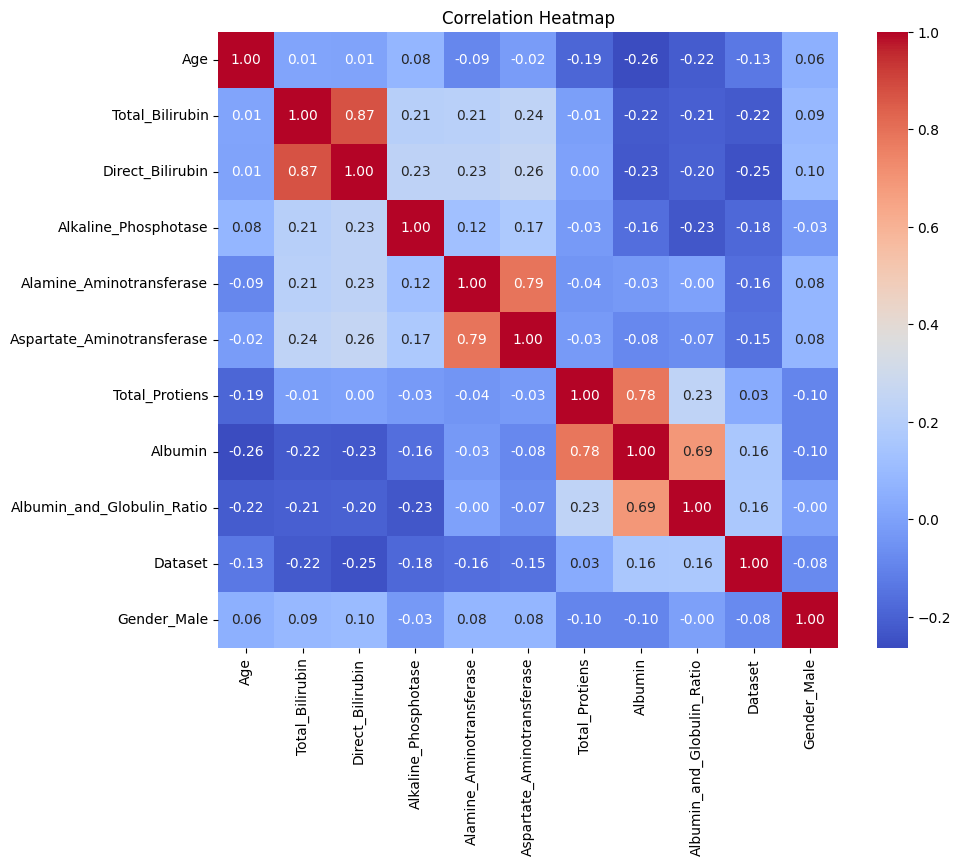

In [19]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Verify the changes
print("Columns after one-hot encoding:", df.columns)
# give a heatmap of the dataset
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()





# 4. Split the data into Training (80%) and Testing (20%) sets

In [20]:
# split the data into training and testing sets 80/20
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'Dataset' is the target variable and the rest are features
X = df.drop('Dataset', axis=1)
y = df['Dataset']

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 5. Train a Logistic Regression model

In [21]:
# Train a logistic regression model
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
model = LogisticRegression(max_iter=1000)
# Fit the model to the training data
model.fit(X_train_scaled, y_train)



LogisticRegression(max_iter=1000)

# 6. Test Logistic Regression Model

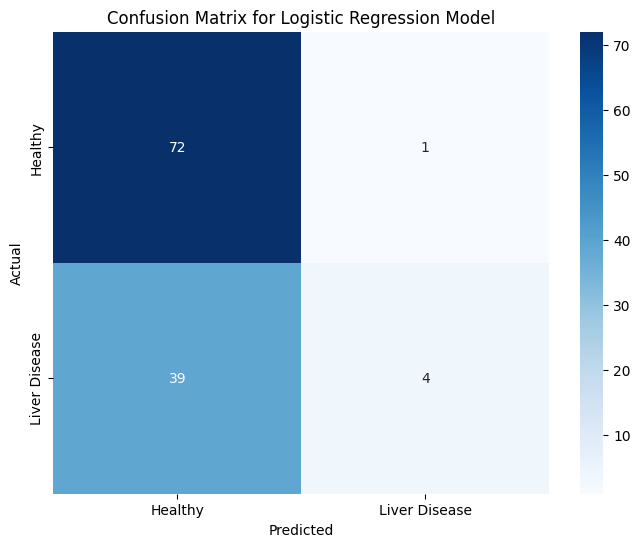

In [22]:
#Test the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
# Visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Liver Disease'], yticklabels=['Healthy', 'Liver Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

# 7. Train a Random Forest Model

In [23]:
# Train a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

# 8. Test Random Forest Model

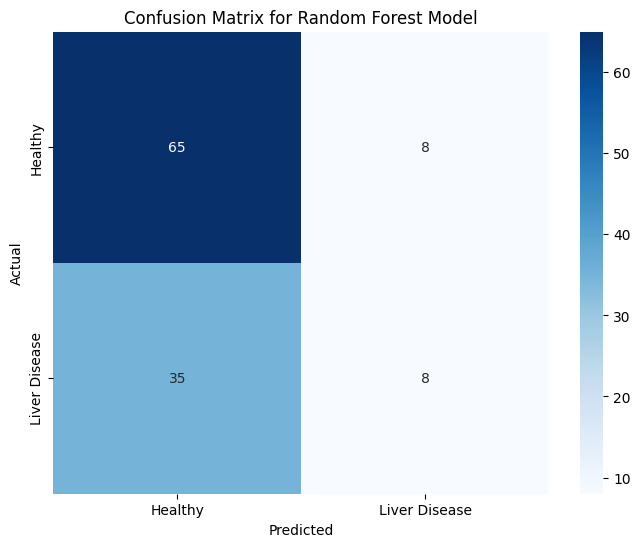

In [24]:
#Test forest model
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)
# Visualize the confusion matrix
# Create a confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Liver Disease'], yticklabels=['Healthy', 'Liver Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# 9. Compare the accuracy of both models on the test data using a bar plot

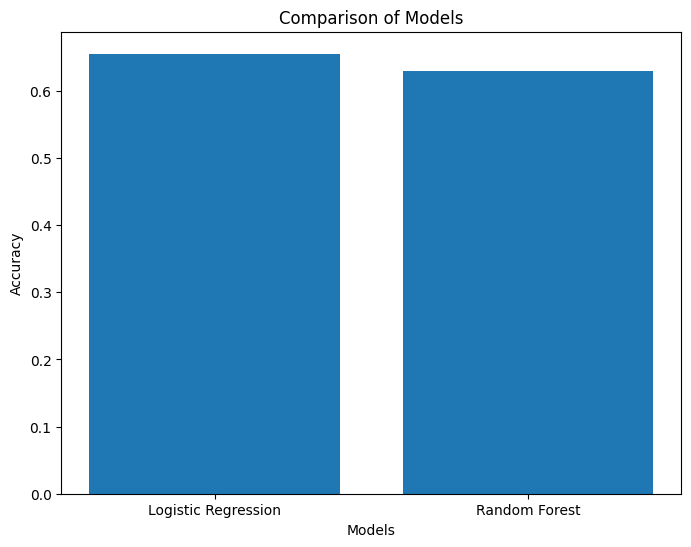

In [25]:
# Compare the two models using bar plot
import matplotlib.pyplot as plt
# Create a bar plot to compare the two models
models = ['Logistic Regression', 'Random Forest']
accuracy = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_rf)]
#plot data points
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Models')
plt.show()

# 10. Print classification data and confusion matrix for Logistic Regression Model

In [26]:
#Print classification data and confusion matrix for logistic regression
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           1       0.65      0.99      0.78        73
           2       0.80      0.09      0.17        43

    accuracy                           0.66       116
   macro avg       0.72      0.54      0.47       116
weighted avg       0.70      0.66      0.55       116

Confusion Matrix for Logistic Regression:
[[72  1]
 [39  4]]


# 11. Print classification data and confusion matrix for Random Forest Model

In [27]:
#Print classification data and confusion matrix for random forest
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           1       0.65      0.89      0.75        73
           2       0.50      0.19      0.27        43

    accuracy                           0.63       116
   macro avg       0.57      0.54      0.51       116
weighted avg       0.59      0.63      0.57       116

Confusion Matrix for Random Forest:
[[65  8]
 [35  8]]


# 12. Visualize missclassified examples for both models

In [28]:
mis_lr = df.loc[X_test.index].copy()
mis_lr['y_true'] = y_test.values
mis_lr['y_pred'] = y_pred
mis_lr = mis_lr[mis_lr.y_true != mis_lr.y_pred]

mis_rf = df.loc[X_test.index].copy()
mis_rf['y_true'] = y_test.values
mis_rf['y_pred'] = y_pred_rf
mis_rf = mis_rf[mis_rf.y_true != mis_rf.y_pred]

print("First 5 mis‑classified by Logistic Regression:")
display(mis_lr.head())

print("\nFirst 5 mis‑classified by Random Forest:")
display(mis_rf.head())

First 5 mis‑classified by Logistic Regression:


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Male,y_true,y_pred
252,65,1.1,0.3,258,48,40,7.0,3.9,1.2,2,True,2,1
564,38,0.6,0.1,165,22,34,5.9,2.9,0.9,2,False,2,1
359,69,0.8,0.2,146,42,70,8.4,4.9,1.4,2,False,2,1
406,45,0.7,0.2,180,18,58,6.7,3.7,1.2,2,True,2,1
86,13,0.6,0.1,320,28,56,7.2,3.6,1.0,2,True,2,1



First 5 mis‑classified by Random Forest:


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Male,y_true,y_pred
252,65,1.1,0.3,258,48,40,7.0,3.9,1.2,2,True,2,1
564,38,0.6,0.1,165,22,34,5.9,2.9,0.9,2,False,2,1
359,69,0.8,0.2,146,42,70,8.4,4.9,1.4,2,False,2,1
86,13,0.6,0.1,320,28,56,7.2,3.6,1.0,2,True,2,1
366,16,0.7,0.2,418,28,35,7.2,4.1,1.3,2,True,2,1


# 13. Rank the models by test score to determine the best one for our dataset

Models ranked by accuracy score:
Logistic Regression: 0.6552
Random Forest: 0.6293


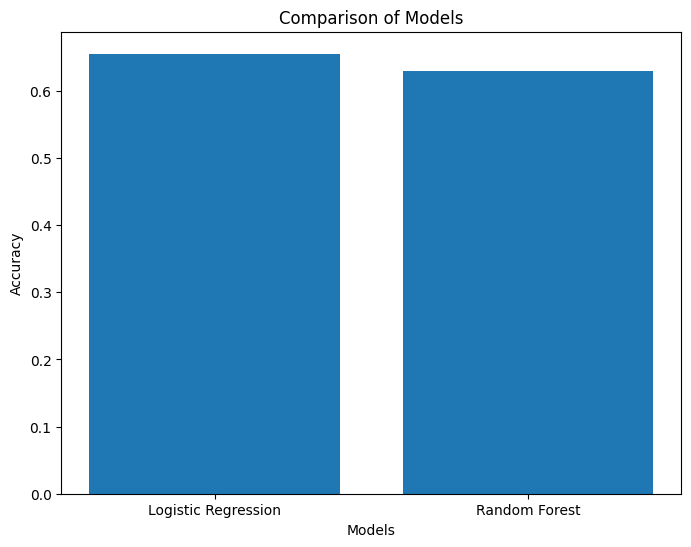

In [29]:
#Rank models by test score to determine the best one for our dataset
from sklearn.metrics import accuracy_score
# Create a list of models and their names
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42))
]
# Create a list to store the accuracy scores
accuracy_scores = []
# Loop through the models and fit them to the training data
for name, model in models:
    # Fit the model to the training data
    model.fit(X_train_scaled, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    # Append the accuracy score to the list
    accuracy_scores.append((name, accuracy))
# Sort the models by accuracy score
accuracy_scores.sort(key=lambda x: x[1], reverse=True)
# Print the sorted models and their accuracy scores
print("Models ranked by accuracy score:")
for name, accuracy in accuracy_scores:
    print(f"{name}: {accuracy:.4f}")
# Create a bar plot to compare the two models and add the accuracy scores
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar([x[0] for x in accuracy_scores], [x[1] for x in accuracy_scores])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Models')
plt.show()
